In [2]:
import pandas as pd
import sys
sys.path.insert(0, '../../src/utils')
from funcs import *
sys.path.insert(0, '../../src/utils')
from general import *

followers_sa = pd.read_parquet('../../data/03-experiment/SA/baseline/01-preprocess/influencers/followers_ties_batch2.parquet')
#followers_sa['weak'] = np.where(followers_sa['strong']== 1, 0, followers_sa['weak'])

followers_sa = followers_sa.drop_duplicates(['influencer_id', 'follower_id'])

followers_grouped_n_sa = followers_sa[['influencer_id', 'follower_id']].groupby('follower_id').count()
followers_grouped_n_sa.rename({'influencer_id': 'n_following'}, axis=1, inplace=True)

followers_grouped_sa = followers_sa.groupby('follower_id').sum()
followers_grouped_sa = followers_grouped_sa.merge(followers_grouped_n_sa, on='follower_id', how='left')
followers_grouped_sa = followers_grouped_sa[['n_following','strong', 'weak']]
followers_grouped_sa['absent'] = followers_grouped_sa['n_following'] - followers_grouped_sa['strong'] - followers_grouped_sa['weak']

followers_ke = pd.read_parquet('../../data/03-experiment/KE/baseline/01-preprocess/influencers/followers_ties_batch2.parquet')
#followers_ke['weak'] = np.where(followers_ke['strong']== 1, 0, followers_ke['weak'])
followers_ke = followers_ke.drop_duplicates(['influencer_id', 'follower_id'])

followers_grouped_n_ke = followers_ke[['influencer_id', 'follower_id']].groupby('follower_id').count()
followers_grouped_n_ke.rename({'influencer_id': 'n_following'}, axis=1, inplace=True)

followers_grouped_ke = followers_ke.groupby('follower_id').sum()
followers_grouped_ke = followers_grouped_ke.merge(followers_grouped_n_ke, on='follower_id', how='left')
followers_grouped_ke = followers_grouped_ke[['n_following','strong', 'weak']]
followers_grouped_ke['absent'] = followers_grouped_ke['n_following'] - followers_grouped_ke['strong'] - followers_grouped_ke['weak']

followers_grouped_sa.reset_index(inplace=True)
followers_grouped_ke.reset_index(inplace=True)
followers_grouped_ke.rename(columns = {'followers':'n_followers',
                            'strong':'n_strong',
                            'weak':'n_weak',
                            'absent':'n_absent'}, inplace = True)
followers_grouped_sa.rename(columns = {'followers':'n_followers',
                            'strong':'n_strong',
                            'weak':'n_weak',
                            'absent':'n_absent'}, inplace = True)

followers_grouped_ke['follower_id'] = followers_grouped_ke['follower_id'].astype(str)
followers_grouped_sa['follower_id'] = followers_grouped_sa['follower_id'].astype(str)

C:\Users\Dell\AppData\Local\Temp\ipykernel_35484\197807707.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  followers_grouped_sa = followers_sa.groupby('follower_id').sum()


FileNotFoundError: [Errno 2] No such file or directory: '../../data/03-experiment/KE/baseline/01-preprocess/influencers/followers_ties_batch2.parquet'

In [2]:
f_g_ke = followers_grouped_ke
f_g_sa = followers_grouped_sa

## Histograms:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

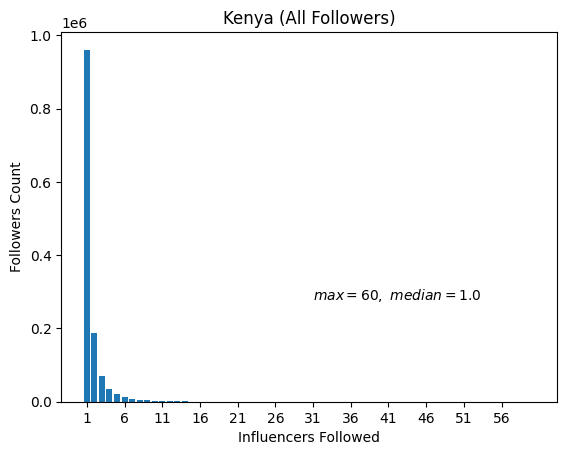

In [7]:
# the histogram of the data
mu, max_n = f_g_ke['n_following'].median(), f_g_ke['n_following'].max()
arr = np.array(f_g_ke['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')

plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('Kenya (All Followers)')
plt.text(31, 277555, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
plt.savefig('../../results/00-summary_stats/KE_all_followers.png')
#plt.ylim(0, 0.03)
plt.show()

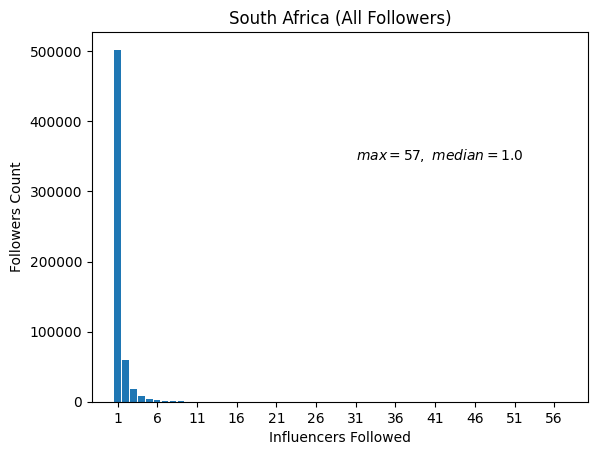

In [8]:
# the histogram of the data
mu, max_n = f_g_sa['n_following'].median(), f_g_sa['n_following'].max()
arr = np.array(f_g_sa['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')

plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('South Africa (All Followers)')
plt.text(31, 345755, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
plt.savefig('../../results/00-summary_stats/SA_all_followers.png')
plt.show()

In [3]:
# Only strong ties:
df_st_ke = f_g_ke[f_g_ke['n_strong']>0]
df_st_sa = f_g_sa[f_g_sa['n_strong']>0]

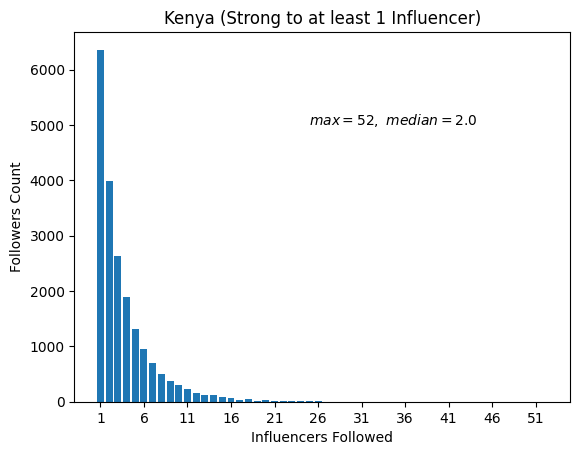

In [10]:
# the histogram of the data
mu, max_n = df_st_ke['n_following'].median(), df_st_ke['n_following'].max()
arr = np.array(df_st_ke['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('Kenya (Strong to at least 1 Influencer)')
plt.text(25, 5000, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/KE_strong.png')
plt.show()

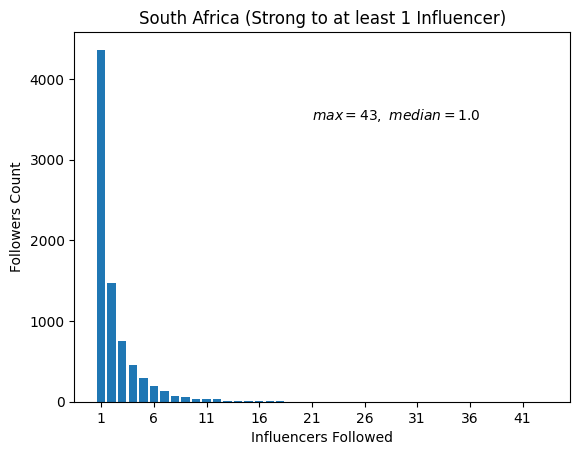

In [12]:
# the histogram of the data
mu, max_n = df_st_sa['n_following'].median(), df_st_sa['n_following'].max()
arr = np.array(df_st_sa['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('South Africa (Strong to at least 1 Influencer)')
plt.text(21, 3500, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/SA_strong.png')
plt.show()

In [4]:
df_w_ke = f_g_ke[f_g_ke['n_weak']>0]
df_w_sa = f_g_sa[f_g_sa['n_weak']>0]

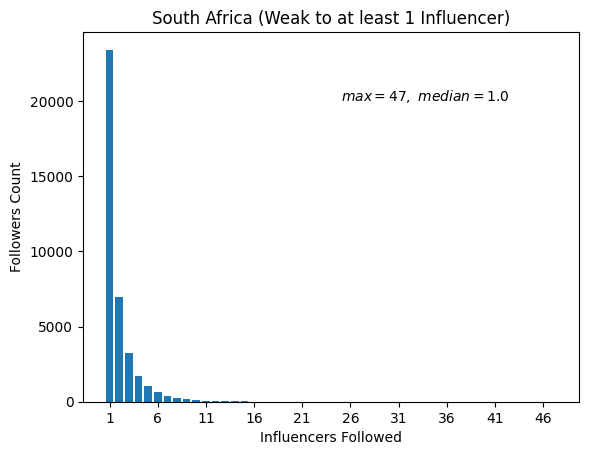

In [15]:
# the histogram of the data
mu, max_n = df_w_sa['n_following'].median(), df_w_sa['n_following'].max()
arr = np.array(df_w_sa['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('South Africa (Weak to at least 1 Influencer)')
plt.text(25, 20000, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/SA_weak.png')
plt.show()

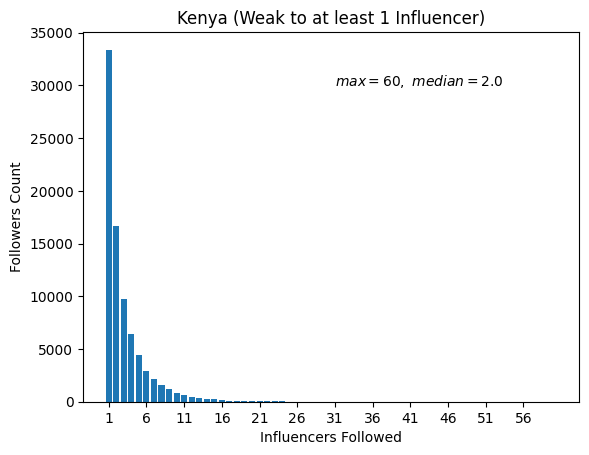

In [17]:
# the histogram of the data
mu, max_n = df_w_ke['n_following'].median(), df_w_ke['n_following'].max()
arr = np.array(df_w_ke['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('Kenya (Weak to at least 1 Influencer)')
plt.text(31, 30000, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/KE_weak.png')
plt.show()

In [5]:
df_ab_ke = f_g_ke[(f_g_ke['n_strong']==0) & (f_g_ke['n_weak']==0)]
df_ab_sa = f_g_sa[(f_g_sa['n_strong']==0) & (f_g_sa['n_weak']==0)]

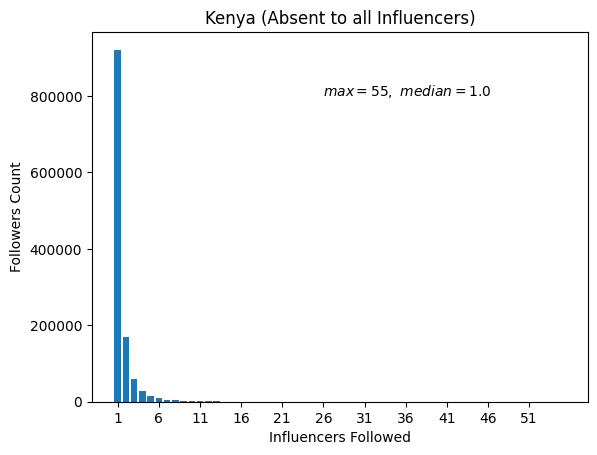

In [20]:
# the histogram of the data
mu, max_n = df_ab_ke['n_following'].median(), df_ab_ke['n_following'].max()
arr = np.array(df_ab_ke['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('Kenya (Absent to all Influencers)')
plt.text(26, 800000, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/KE_absent.png')
plt.show()

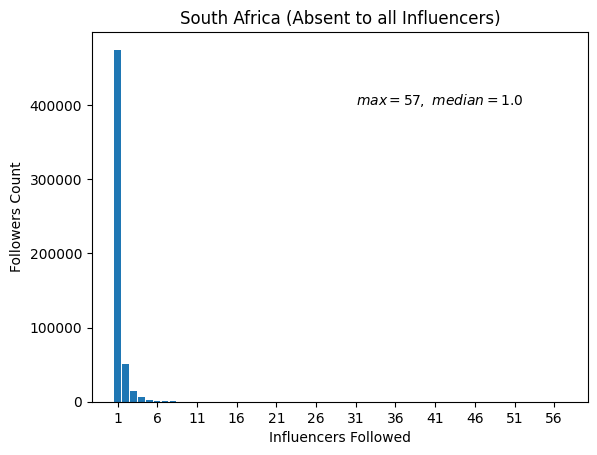

In [23]:
# the histogram of the data
mu, max_n = df_ab_sa['n_following'].median(), df_ab_sa['n_following'].max()
arr = np.array(df_ab_sa['n_following'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center')
#n, bins, patches = plt.hist(df_st_ke['n_following'], 15, facecolor='b', alpha=0.75)


plt.xlabel('Influencers Followed')
plt.ylabel('Followers Count')
plt.title('South Africa (Absent to all Influencers)')
plt.text(31, 400000, f'$max={max_n},\ median={mu}$')
plt.xticks(np.arange(1, max_n+1, 5.0))
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.savefig('../../results/00-summary_stats/SA_absent.png')
plt.show()

In [6]:
# Number or each:
# KE
print('All Followers:', len(f_g_ke), ', Strong:', len(df_st_ke), ', Weak:', 
      len(df_w_ke), ', Absent to all:', len(df_ab_ke))

All Followers: 532050 , Strong: 7864 , Weak: 39634 , Absent to all: 486269


In [7]:
# Number or each:
# SA
print('All Followers:', len(f_g_sa), ', Strong:', len(df_st_sa), ', Weak:', 
      len(df_w_sa), ', Absent to all:', len(df_ab_sa))

All Followers: 620852 , Strong: 4195 , Weak: 23914 , Absent to all: 593167
